# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import spacy
import re
import collections
from collections import Counter
import string
from string import punctuation

In [2]:
from statistics import mean

from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import en_core_web_sm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Load Dataset

In [5]:
tweets_bowl = pd.read_csv('https://raw.githubusercontent.com/raisasalsabily/airflow-docker/main/social.csv')
tweets_bowl.head(15)

,user,text
0,ArisaKamilia,kemandirian ekonomi santri di dukung oleh ganj...
1,benk_setia,RT @ziezie84187091: Halo para SLANKERS ada kon...
2,BudiJangkrik27,@Sutikno37920576 @Taufiq13796699 @tangankubica...
3,aa_angon2,RT @aan_muba: AYO DUKUNG TOTAL GANJAR PRANOWO ...
4,setyawarni123,RT @Hasbil_Lbs: Yg lalu Anies/AHY (1066 vote) ...
5,MNubuwah,RT @BangEdiii: gw kira ada apaan kok #jokodok ...
6,Irmiku13,RT @Y07d1_40s1H: DI DEPAN PRABOWO DIA BILANG 2...
7,liest07list,RT @Azhar_k18: Pak Jokowi endorse Ganjar Prano...
8,sahnur_afinda,"RT @Aryprasetyo85: @ganjarpranowo menambahkan,..."
9,sahnur_afinda,RT @Aryprasetyo85: Peringatan Hari Ulang Tahun...


# Preprocessing

## Text Cleaning

In [6]:
# menghilangkan hashtags, mentions dan unwanted characters dari the teks
def clean_text(df, text):
    df[text] = df[text].str.lower()
    df[text] = df[text].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

clean_tweets = clean_text(tweets_bowl, 'text')
clean_tweets.head(15)

,user,text
0,ArisaKamilia,kemandirian ekonomi santri di dukung oleh ganj...
1,benk_setia,halo para slankers ada konser ultah slank ya...
2,BudiJangkrik27,id intinya pak ganjar pranowo menjalankan m...
3,aa_angon2,muba ayo dukung total ganjar pranowo presiden...
4,setyawarni123,lbs yg lalu aniesahy 1066 vote vs ganjarkhofi...
5,MNubuwah,gw kira ada apaan kok jokodok trending terny...
6,Irmiku13,40s1h di depan prabowo dia bilang 2024 jatah ...
7,liest07list,k18 pak jokowi endorse ganjar pranowo dengan ...
8,sahnur_afinda,menambahkan cara ini bisa jadi solusi dalam...
9,sahnur_afinda,peringatan hari ulang tahun korpri ke 51 di ...


## Tokenisasi, Lemmanisasi, dan Menghilangkan Stopwords

In [7]:
#menghilangkan stopwords, punctuations, lemmatize dan tokenize word
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('indonesian'))
punctuation = list(string.punctuation) #already taken care of with the cleaning function.
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

In [8]:
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
#     for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)
            
tweets_bowl.text = tweets_bowl.text.apply(furnished)

In [9]:
tweets_bowl.sample(15)

,user,text
1781,sandra_dwi19,kaget tenan ikbapakku opo choki kiguanteng poll
1406,wulandari.arry,kados mahasiswa pakganfresh awet muda
1963,cunongvania,
1993,shantyasmoro,memanfaatkan teman ga
1444,deelestarie_mc,capani
1519,xtatnd._,tikete mpon telas
281,AyundaMisty,kode jokowi prabowo sambutan hut partai perind...
1071,arto_joyo,
406,tuiterimud,ratusan ulama dukung ganjar capres
236,Putri7Utami7,rakyat jateng sejahtera ganjar naikkan ump 801...


# Text Classification

## Sets of *Words*

#### Define The Sets

In [10]:
konotasi_positif = '''baik keren ramah lembut tegas mantap cakep enak akrab sopan 
                    santun percaya yakin sabar terbaik rajin tinggi bijaksana sahabat 
                    semangat cinta melesat kuat hebat gebrakan prestis mantap menang
                    melambung cerdas prestasi juara cakap pintar efektif efisien
                    kreatif inovatif solutif berwibawa ceria tampan lancar positif
                    kharisma karisma bersinar tercinta teratas kekasih ganteng
                    pahlawan bunga disayang top sayang suka bersih jujur ikhlas
                    wibawa demokratis'''

In [11]:
konotasi_negatif = '''kasar buruk jelek sombong keras jahat rendah mampus bobrok 
                    kebobrokan provokasi provokator korupsi antek hancur memaksa kecewa
                    buzzer fitnah caci maki kalah gagal kalah teroris bodoh aneh gila
                    borok kacung jorok parah negatif beking koruptor maling sampah
                    copet palsu mati bohong edan bangsat bayaran payah becus malas males
                    durhaka mencuri pencuri adu asu bulus licik kelahi perkelahian
                    tipu muslihat sial kianat khianat pengkhiat penjilat bangkai'''

#### Preprocessing The Sets

In [12]:
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('indonesian'))
punctuation = list(string.punctuation)
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

# clean the set of words
            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)

In [13]:
# clean the set of words
# tokenizing and removing stop words from the sets
positif = furnished(konotasi_positif)
negatif = furnished(konotasi_negatif)

In [14]:
# delete duplicates
string1 = positif
words = string1.split()
positif = " ".join(sorted(set(words), key=words.index))
positif

'keren ramah lembut mantap cakep enak akrab sopan santun percaya sabar terbaik rajin bijaksana sahabat semangat cinta melesat kuat hebat gebrakan prestis menang melambung cerdas prestasi juara cakap pintar efektif efisien kreatif inovatif solutif berwibawa ceria tampan lancar positif kharisma karisma bersinar tercinta teratas kekasih ganteng pahlawan bunga disayang top sayang suka bersih jujur ikhlas wibawa demokratis'

In [15]:
string1 = negatif
words = string1.split()
negatif = " ".join(sorted(set(words), key=words.index))
negatif

'kasar buruk jelek sombong kera jahat rendah mampus bobrok kebobrokan provokasi provokator korupsi antek hancur memaksa kecewa buzzer fitnah caci maki kalah gagal teroris bodoh aneh gila borok kacung jorok parah negatif beking koruptor maling sampah copet palsu mati bohong edan bangsat bayaran payah becus malas male durhaka mencuri pencuri adu asu bulus licik kelahi perkelahian tipu muslihat sial kianat khianat pengkhiat penjilat bangkai'

#### Vectorizing and Standadization
just for cosine similarity

In [16]:
'''Vectorizing the sets of words, then standardizing them. TFIDF will be used in order to take care of the least 
frequent words. Standardizing is cause TFIDF favors long sentences and there'll be inconsistencies between the length 
of the tweets and the length of set of words.'''


def get_vectors(self, *strs):
    text = [t for t in strs]
    vectorizer = TfidfVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [ ]:
# positif_vector = get_vectors(positif)

In [ ]:
## Vectorizing the tweets
tv = TfidfVectorizer()
# tweets_bowl = tweets_bowl.text.apply(get_vectors)
# tweets_bowl.head()
tfidf_tweets = tv.fit_transform(tweets_bowl.text)

## Jaccard Similarity

In [16]:
'''Jaccard similarity is good for cases where duplication does not matter, 
cosine similarity is good for cases where duplication matters while analyzing text similarity. For two product descriptions, 
it will be better to use Jaccard similarity as repetition of a word does not reduce their similarity.'''

def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
# jaccard_score(socialvector, economic_vector)

#for similarity of 1 and 2 of column1
# jaccard_similarity('dog lion a dog','dog is cat')

In [17]:
def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

In [18]:
# positif score
p_scores = get_scores(positif, tweets_bowl.text.to_list())
p_scores[-10:]

[0.4166666666666667,
 0.48,
 0.9166666666666666,
 0.0,
 0.16666666666666666,
 0.75,
 0.4444444444444444,
 0.5,
 0.7083333333333334,
 0.5416666666666666]

In [19]:
# negatif score
n_scores = get_scores(negatif, tweets_bowl.text.to_list())
n_scores[-10:]

[0.4,
 0.46153846153846156,
 0.88,
 0.0,
 0.16,
 0.72,
 0.42857142857142855,
 0.48,
 0.68,
 0.52]

# Clustered Data Frame

In [20]:
'''df baru dengan names dan jaccard scores untuk tiap konotasi'''

data  = {'names':tweets_bowl.user.to_list(), 
         'positive_score':p_scores,
         'negative_score': n_scores}
scores_df = pd.DataFrame(data)
scores_df.head(15)

,names,positive_score,negative_score
0,ArisaKamilia,0.666667,0.640000
1,benk_setia,0.615385,0.592593
2,BudiJangkrik27,0.791667,0.760000
3,aa_angon2,0.814815,0.785714
4,setyawarni123,0.714286,0.689655
5,MNubuwah,0.800000,0.840000
6,Irmiku13,0.714286,0.689655
7,liest07list,0.750000,0.724138
8,sahnur_afinda,0.750000,0.720000
9,sahnur_afinda,0.730769,0.703704


In [21]:
'''Penglasteran text'''

def get_clusters(l1, l2):
    posy = []
    negy = []

    for i, j in zip(l1, l2):
        m = max(i, j)
        if m == i:
            posy.append(1)
        else:
            posy.append(0)
        if m == j:
            negy.append(1)
        else:
            negy.append(0)        
          
            
    return posy, negy

In [22]:
l1 = scores_df.positive_score.to_list()
l2 = scores_df.negative_score.to_list()

posy, negy = get_clusters(l1, l2)

In [23]:
data = {'name': scores_df.names.to_list(), 'positive':posy, 'negative':negy}
cluster_df = pd.DataFrame(data)
cluster_df.head(15)

,name,positive,negative
0,ArisaKamilia,1,0
1,benk_setia,1,0
2,BudiJangkrik27,1,0
3,aa_angon2,1,0
4,setyawarni123,1,0
5,MNubuwah,0,1
6,Irmiku13,1,0
7,liest07list,1,0
8,sahnur_afinda,1,0
9,sahnur_afinda,1,0


In [24]:
'''Karena ada kemungkinan beberapa text memiliki kedua kategori, 
jadi untuk menjaga agar baris dengan jumlah > 1 harus berbagi kategori. 
Setelah ini, pengelompokan akan menangani fraksi'''


a =  cluster_df[['positive', 'negative']].sum(axis = 1) > 1
c = cluster_df[['positive', 'negative']].sum(axis = 1)
# b = cluster_df.copy()
cluster_df.loc[(a), ['positive', 'negative']] = 1/c

In [25]:
cluster_df.shape

(2058, 3)

In [26]:
pivot_clusters = cluster_df.groupby(['name']).sum()
pivot_clusters['positive'] = pivot_clusters['positive'].astype(int)
pivot_clusters['negative'] = pivot_clusters['negative'].astype(int)
pivot_clusters['total'] = pivot_clusters['positive'] + pivot_clusters['negative']
pivot_clusters.loc["Total"] = pivot_clusters.sum()  #jumlah total row

print(pivot_clusters.shape)
pivot_clusters.tail()

(1023, 3)


,positive,negative,total
name,,,
zainaputrii26,2,0,2
zarhendrik,1,1,2
zelzell27,3,0,3
zhafran.daffaa,1,0,1
Total,1952,61,2013


### Visualisations

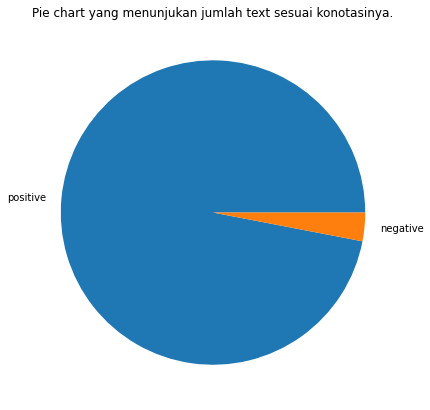

In [27]:
'''Pie chart untuk menunjukan jumlah text sesuai konotasinya.'''

fig = plt.figure(figsize =(10, 7)) 
a = pivot_clusters.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('Pie chart yang menunjukan jumlah text sesuai konotasinya.')
plt.show() 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'total tweet')

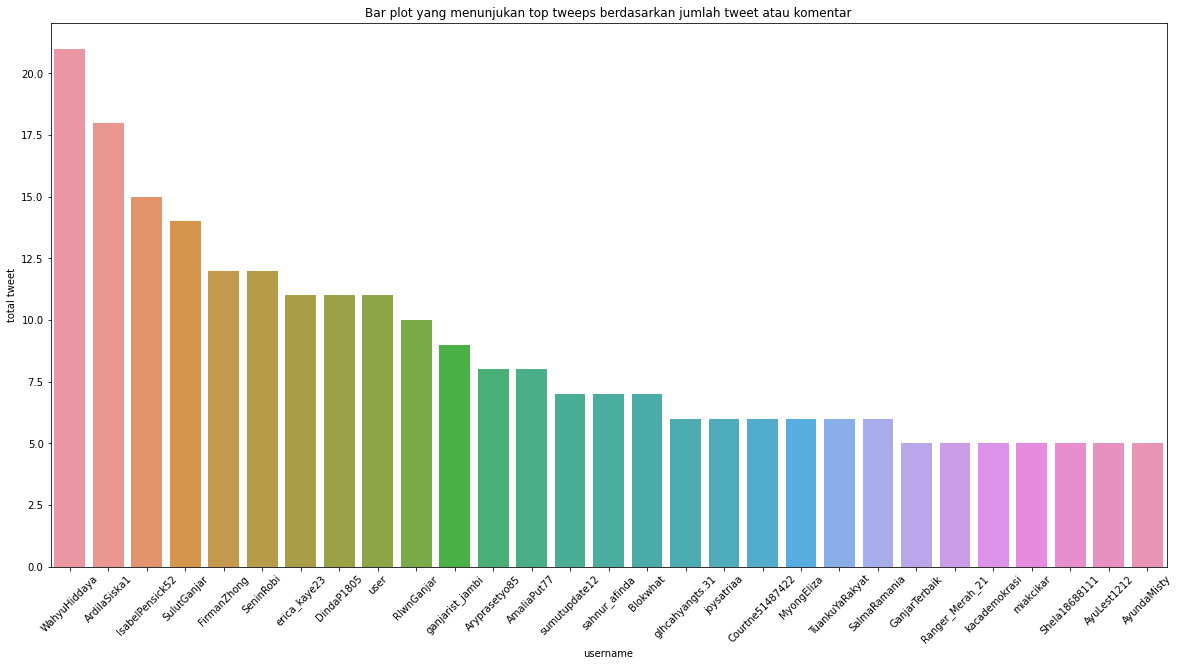

In [28]:
''' User dengan tweet atau komentar terbanyak'''

d = pivot_clusters.sort_values(by = 'total', ascending  = False)
e = d.head(30)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(20,10))
sns.barplot(x = e.index, y = e.total)
plt.title('Bar plot yang menunjukan top tweeps berdasarkan jumlah tweet atau komentar')
plt.xticks(rotation=45)
plt.xlabel('username')
plt.ylabel('total tweet')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'tweet positif')

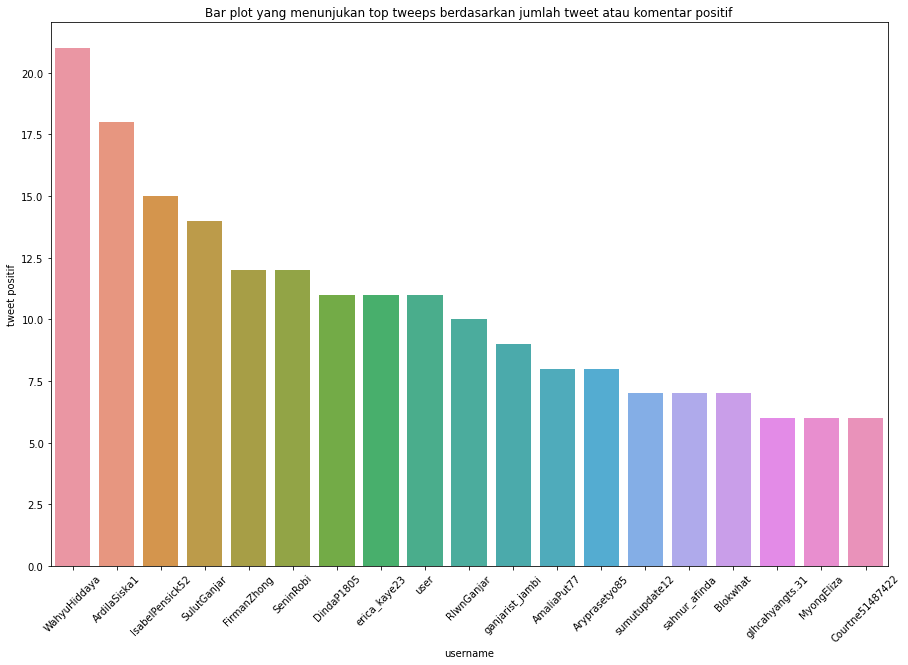

In [29]:
''' User dengan tweet atau komentar positif terbanyak'''

d = pivot_clusters.sort_values(by = 'positive', ascending  = False)
e = d.head(20)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(15,10))
sns.barplot(x = e.index, y = e.positive)
plt.title('Bar plot yang menunjukan top tweeps berdasarkan jumlah tweet atau komentar positif')
plt.xticks(rotation=45)
plt.xlabel('username')
plt.ylabel('tweet positif')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'tweet negatif')

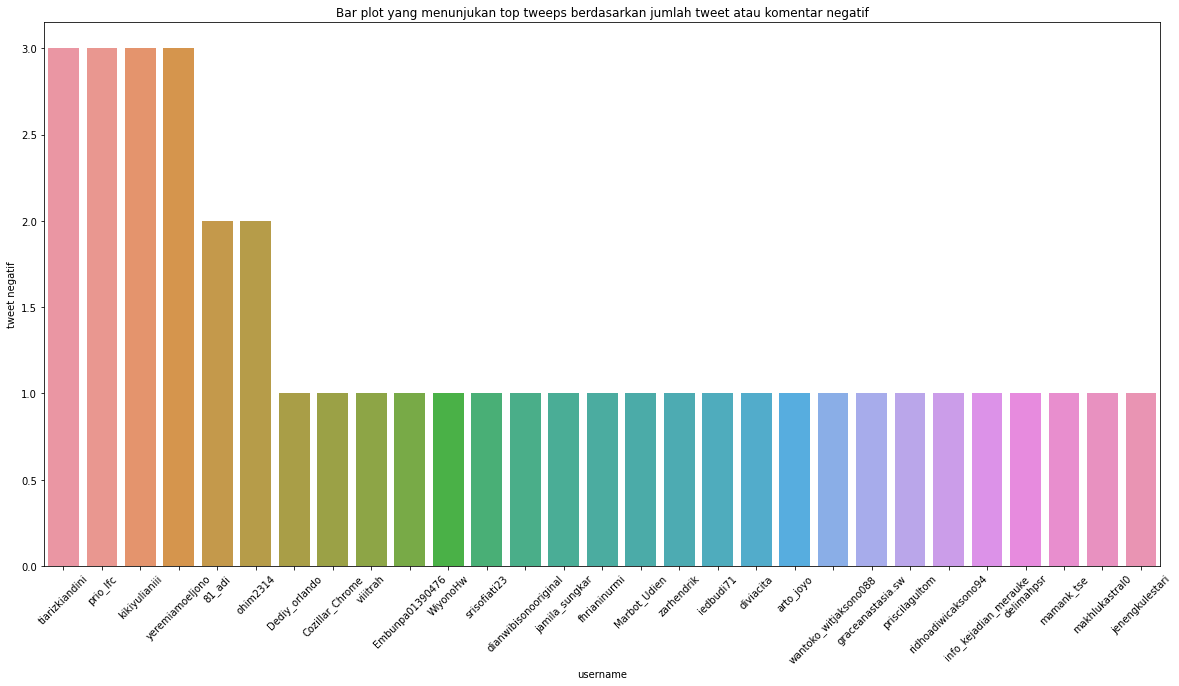

In [30]:
''' User dengan tweet atau komentar negatif terbanyak'''

d = pivot_clusters.sort_values(by = 'negative', ascending  = False)
e = d.head(30)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(20,10))
sns.barplot(x = e.index, y = e.negative)
plt.title('Bar plot yang menunjukan top tweeps berdasarkan jumlah tweet atau komentar negatif')
plt.xticks(rotation=45)
plt.xlabel('username')
plt.ylabel('tweet negatif')

#### Distribution test

In [31]:
print(pivot_clusters.shape)
pivot_clusters.tail(4)

(1023, 3)


,positive,negative,total
name,,,
zarhendrik,1,1,2
zelzell27,3,0,3
zhafran.daffaa,1,0,1
Total,1952,61,2013


In [32]:
# drop the totals row.
pivot_clusters.drop(pivot_clusters.tail(1).index,inplace=True)
print(pivot_clusters.shape)
pivot_clusters.tail(4)

(1022, 3)


,positive,negative,total
name,,,
zainaputrii26,2,0,2
zarhendrik,1,1,2
zelzell27,3,0,3
zhafran.daffaa,1,0,1


Tweet positif 


 mu = 1.91 and sigma = 1.68



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

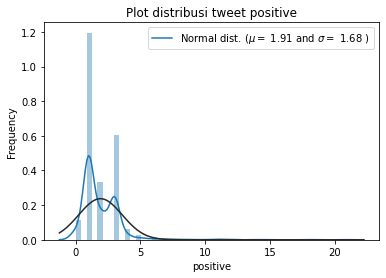

In [33]:
# Target variable
sns.distplot(pivot_clusters.positive , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.positive)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.title('Plot distribusi tweet positive')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')

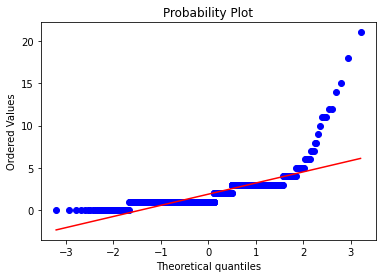

In [34]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.positive, plot=plt)
plt.show()

Tweet negatif


 mu = 0.06 and sigma = 0.29



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

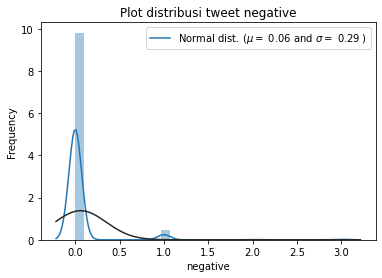

In [35]:
# Target variable
sns.distplot(pivot_clusters.negative , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.negative)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.title('Plot distribusi tweet negative')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')

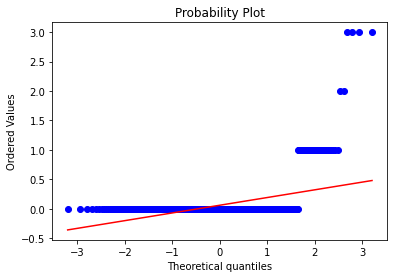

In [36]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.negative, plot=plt)
plt.show()

## KMeans Clustering

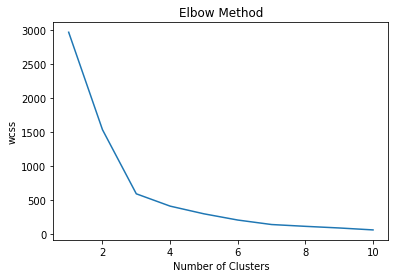

In [37]:
X = pivot_clusters[['positive', 'negative']].values

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

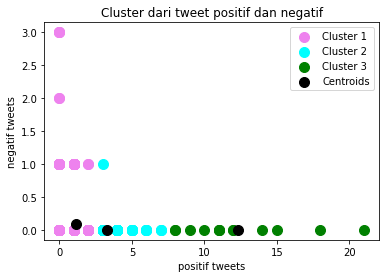

In [38]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Cluster dari tweet positif dan negatif')
plt.xlabel('positif tweets')
plt.ylabel('negatif tweets')
plt.legend()
plt.show()

### KMeans with PCA

In [39]:
seg = pivot_clusters.copy()
# seg = seg.drop

pca = PCA()
pca.fit(seg)

PCA()

In [40]:
pca.explained_variance_ratio_

array([9.78001314e-01, 2.19986858e-02, 1.02043557e-29])

Text(0, 0.5, 'cummulative explained variance')

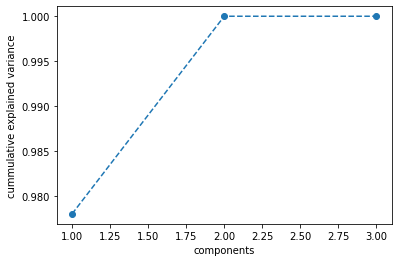

In [41]:
plt.figure()
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('components')
plt.ylabel('cummulative explained variance')

In [42]:
pca = PCA(n_components = 2)
pca.fit(seg)

PCA(n_components=2)

In [43]:
scores = pca.transform(seg)

Text(0, 0.5, 'wcss')

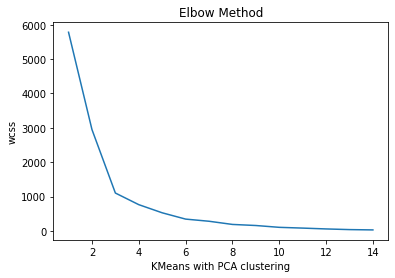

In [44]:
# Elbow Method
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(scores)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('Elbow Method')
plt.xlabel('KMeans with PCA clustering')
plt.ylabel('wcss')

In [45]:
n = 4
kmeans_pca = KMeans(n_clusters = n, init = 'k-means++', random_state = 0)
kmeans_pca.fit(scores)

KMeans(n_clusters=4, random_state=0)

In [46]:
c = pd.concat([seg.reset_index(drop = True), pd.DataFrame(scores)], axis = 1)
c.columns.values[-2:] = ['component1', 'component2']
c['segment_kmeans_pca'] = kmeans_pca.labels_

In [47]:
c.tail()

,positive,negative,total,component1,component2,segment_kmeans_pca
1017,2,0,2,0.086008,-0.072033,0
1018,2,0,2,0.086008,-0.072033,0
1019,1,1,2,-0.636333,1.143789,1
1020,3,0,3,1.500111,-0.054379,0
1021,1,0,1,-1.328096,-0.089687,1


Text(0.5, 1.0, 'Clusters by PCA')

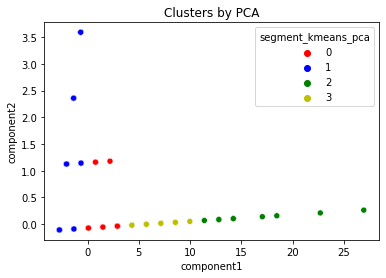

In [48]:
plt.figure()
sns.scatterplot(x = c['component1'], y = c['component2'], hue = c['segment_kmeans_pca'], palette = ['r', 'b', 'g', 'y'])
plt.title('Clusters by PCA')